In [230]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [231]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv -O netflix.csv

--2023-03-28 17:30:36--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 18.65.40.200, 18.65.40.33, 18.65.40.103, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|18.65.40.200|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3399671 (3.2M) [text/plain]
Saving to: ‘netflix.csv’

netflix.csv         100%[===================>]   3.24M  20.7MB/s    in 0.2s    

2023-03-28 17:30:36 (20.7 MB/s) - ‘netflix.csv’ saved [3399671/3399671]



In [232]:
df = pd.read_csv('netflix.csv')
data = pd.read_csv('netflix.csv')


#1. Defining Problem Statement and Analysing basic metrics

### About NETFLIX

Netflix is one of the most popular media and video streaming platforms. They have over 10000 movies or tv shows available on their platform, as of mid-2021, they have over 222M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.

### Problem Statement

Analyze the data and generate insights that could help Netflix ijn deciding which type of shows/movies to produce and how they can grow the business in different countries

### Analysing basic metrics

The dataset provided to you consists of a list of all the TV shows/movies available on Netflix:

* Show_id: Unique ID for every Movie / Tv Show
* Type: Identifier - A Movie or TV Show
* Title: Title of the Movie / Tv Show
* Director: Director of the Movie
* Cast: Actors involved in the movie/show
* Country: Country where the movie/show was produced
* Date_added: Date it was added on Netflix
* Release_year: Actual Release year of the movie/show
* Rating: TV Rating of the movie/show
* Duration: Total Duration - in minutes or number of seasons
* Listed_in: Genre
* Description: The summary description

# 2. Observations on the shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), missing value detection, statistical summary

In [233]:
df.shape #shape of data

(8807, 12)

In [234]:
df.info() #data types of all the attributes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [235]:
df.isna().sum() #missing value detection - across every column

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [236]:
df.describe() #statistical summary

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [237]:
df.describe(include='object') #statistical summary

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


# 3. Non-Graphical Analysis: Value counts and unique attributes 

In [238]:
#Missing value treatment
df['director']=df['director'].fillna('director unknown')
df['cast']=df['cast'].fillna('cast unknown')
df['country']=df['country'].fillna('country unknown')
df = df.dropna().reset_index(drop=True) 

In [239]:
#unnesting nested columns & preparing separate unnested dfs
df_director = df.assign(director=df['director'].str.split(',')).explode('director')
df_cast = df.assign(cast=df['cast'].str.split(',')).explode('cast')
df_country = df.assign(country = lambda x : x['country'].str.split(',').str[0]) #considering only first country in every row
df_listed_in = df.assign(listed_in=df['listed_in'].str.split(', ')).explode('listed_in')

In [240]:
#Changing datatype of date_added column to datetime & unnesting duration column
df['date_added'] = pd.to_datetime(df['date_added'])
df_new = df.assign(duration= lambda x : x['duration'].str.split(' ').str[0].astype(int))

In [241]:
#value counts
type_count = df['type'].value_counts()
director_count = df_director['director'].value_counts()
cast_count = df_cast['cast'].value_counts()
country_count = df_country['country'].value_counts()
rating_count = df['rating'].value_counts()
listed_in_count = df_listed_in['listed_in'].value_counts()

rating_count #value count example

TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: rating, dtype: int64

In [242]:
#Unique attributes 
content_type=df['type'].unique()
directors=df_director['director'].unique()
cast=df_cast['cast'].unique()
listed_in=df_listed_in['listed_in'].unique()
country=df_country['country'].unique()
rating=df['rating'].unique()

rating #Unique attributes example


array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

In [243]:
#nunique  
content_type=df['type'].nunique()
directors=df_director['director'].nunique()
cast=df_cast['cast'].nunique()
listed_in=df_listed_in['listed_in'].nunique()
country=df_country['country'].nunique()
rating=df['rating'].nunique()

rating #nunique o/p example


14

# 4. Visual Analysis - Univariate, Bivariate after pre-processing of the data

### Note: Pre-processing involves unnesting of the data in columns like Actor, Director, Country



### 4.1 For continuous variable(s)

In [244]:
#Pre-processing
#unnesting nested columns & preparing separate unnested dfs
df_director = df.assign(director=df['director'].str.split(',')).explode('director')
df_cast = df.assign(cast=df['cast'].str.split(',')).explode('cast')
df_country = df.assign(country = lambda x : x['country'].str.split(',').str[0]) #considering only first country in every row
df_listed_in = df.assign(listed_in=df['listed_in'].str.split(', ')).explode('listed_in')
df['date_added'] = pd.to_datetime(df['date_added']) #Changing datatype to datetime
df_new = df.assign(duration= lambda x : x['duration'].str.split(' ').str[0].astype(int)) #unnesting duration column


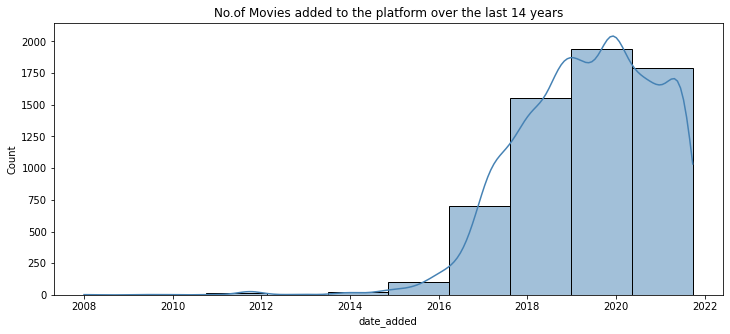

In [245]:
#No.of Movies added to the platform over the last 14 years
plt.figure(figsize=(12,5))
sns.histplot(data=df.loc[df['type']=='Movie'],x='date_added',bins=10,kde=True,color='steelblue')
plt.title('No.of Movies added to the platform over the last 14 years')
plt.show()

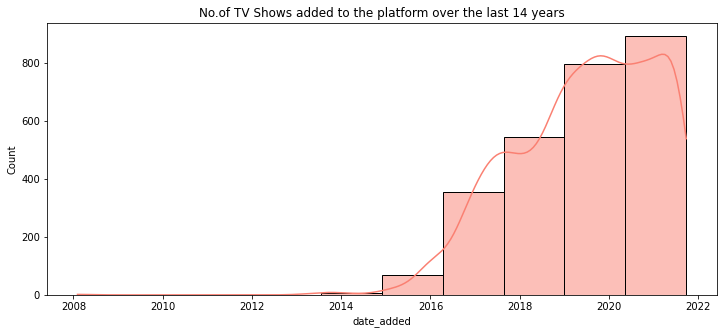

In [246]:
#No.of TV Shows added to the platform over the last 14 years
plt.figure(figsize=(12,5))
sns.histplot(data=df.loc[df['type']=='TV Show'],x='date_added',bins=10,kde=True,color='salmon')
plt.title('No.of TV Shows added to the platform over the last 14 years')
plt.show()

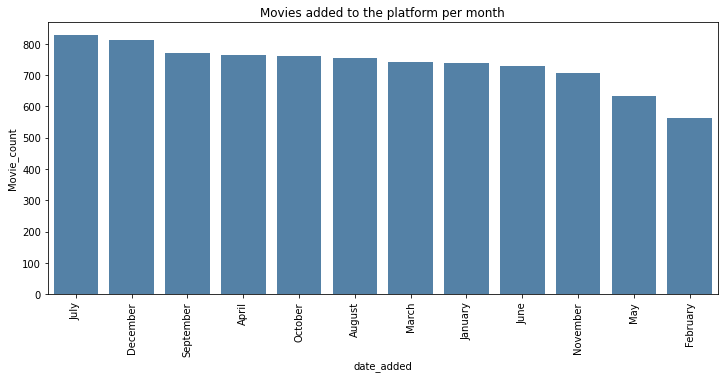

In [264]:
#Movies added to the platform per month
plt.figure(figsize=(12,5))
month=df['date_added'].dt.month_name()
sns.countplot(data=df.loc[df['type']=='Movie'],x=month,order=month.value_counts().index,color='steelblue')
plt.xticks(rotation=90)
plt.ylabel('Movie_count')
plt.title('Movies added to the platform per month')
plt.show()

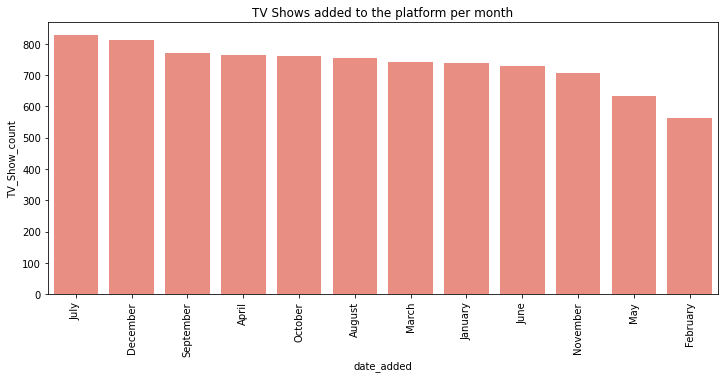

In [248]:
#TV Shows added to the platform per month
plt.figure(figsize=(12,5))
month=df['date_added'].dt.month_name()
sns.countplot(data=df.loc[df['type']=='TV Show'],x=month,order=month.value_counts().index,color='salmon')
plt.xticks(rotation=90)
plt.ylabel('TV_Show_count')
plt.title('TV Shows added to the platform per month')
plt.show()

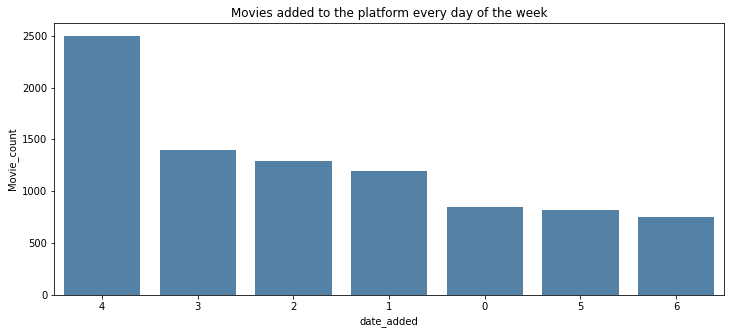

In [265]:
#Movies added to the platform every day of the week
plt.figure(figsize=(12,5))
day=df['date_added'].dt.weekday
sns.countplot(data=df.loc[df['type']=='Movie'],x=day,order=day.value_counts().index,color='steelblue')
plt.ylabel('Movie_count')
plt.title('Movies added to the platform every day of the week')
plt.show()

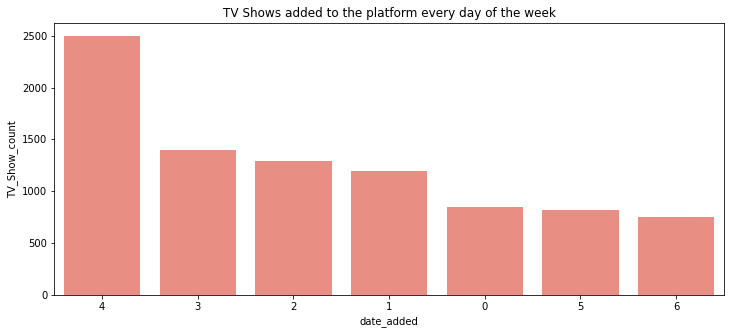

In [250]:
#TV Shows added to the platform every day of the week
plt.figure(figsize=(12,5))
day=df['date_added'].dt.weekday
sns.countplot(data=df.loc[df['type']=='TV Show'],x=day,order=day.value_counts().index,color='salmon')
plt.ylabel('TV_Show_count')
plt.title('TV Shows added to the platform every day of the week')
plt.show()

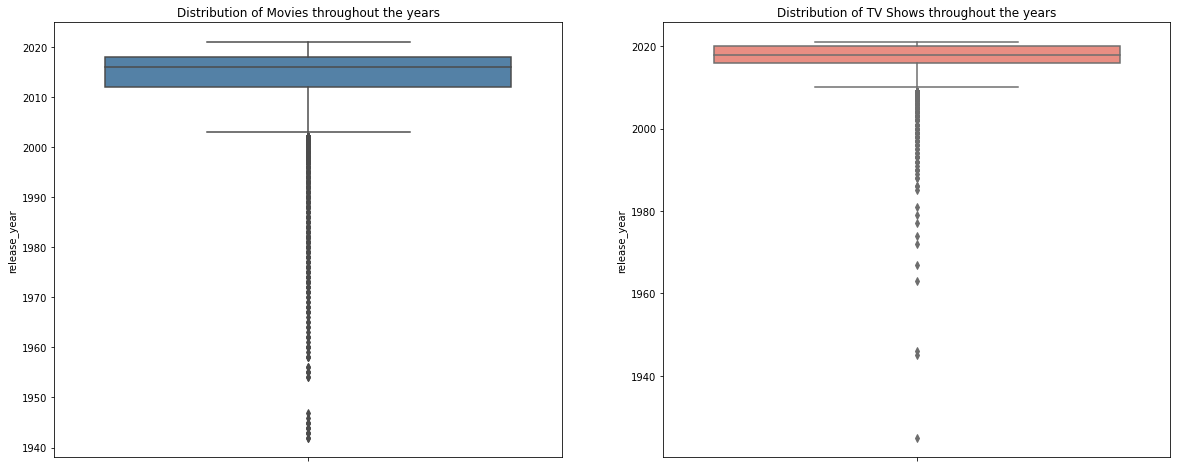

In [262]:
plt.figure(figsize=(20,8))
#Distribution of Movies throughout the years
plt.subplot(1,2,1)
sns.boxplot(data=df.loc[df['type']=='Movie'],y='release_year',color='steelblue')
plt.title('Distribution of Movies throughout the years')

#Distribution of TV Shows throughout the years
plt.subplot(1,2,2)
sns.boxplot(data=df.loc[df['type']=='TV Show'],y='release_year',color='salmon')
plt.title('Distribution of TV Shows throughout the years')
plt.show()

### 4.2 For categorical variable(s)



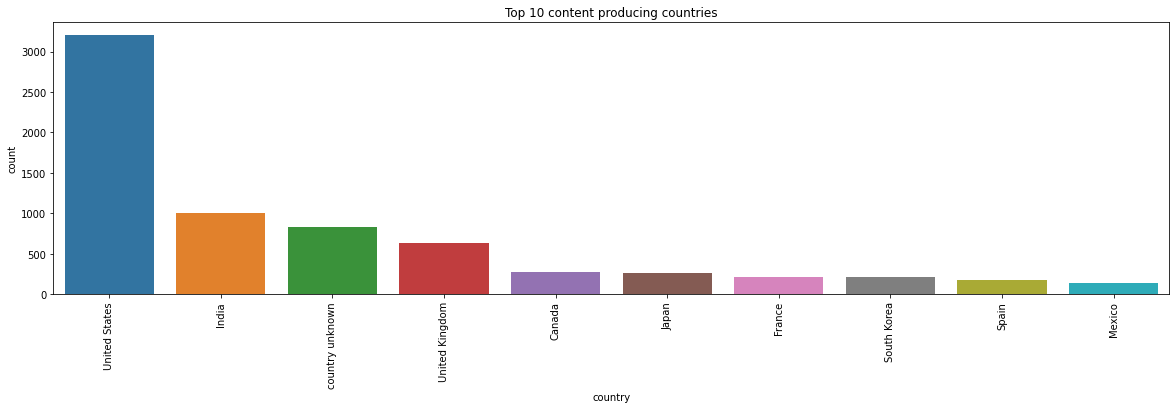

In [252]:
#Top 10 content producing countries
plt.figure(figsize=(20,5))
top_10 = df_country['country'].value_counts().index[:10]
sns.countplot(data=df_country.loc[df_country['country'].isin(top_10)],x='country',order=top_10)
plt.title('Top 10 content producing countries')
plt.xticks(rotation=90)
plt.show()

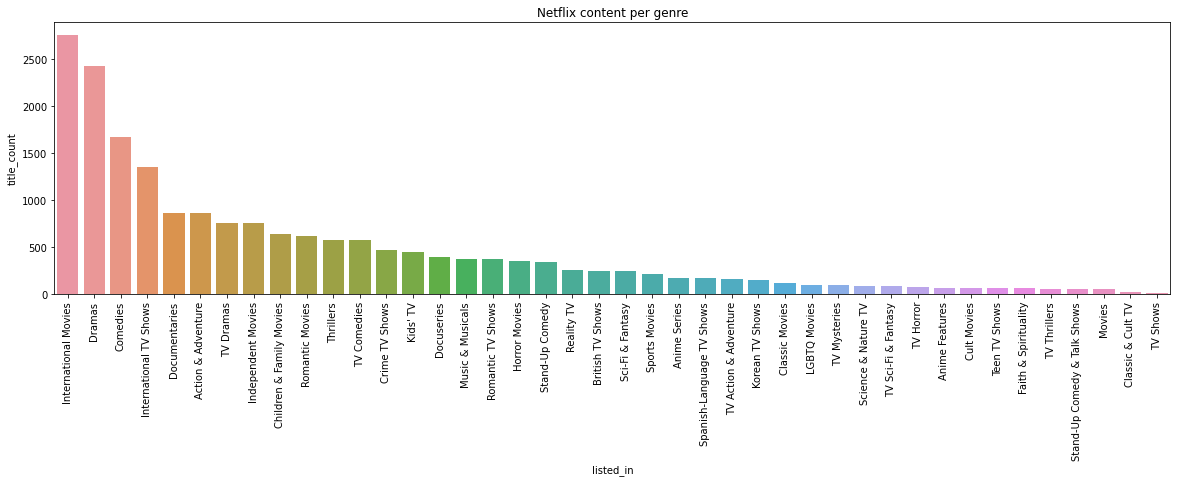

In [253]:
#Netflix content per genre
plt.figure(figsize=(20,5))
sns.countplot(data=df_listed_in,x='listed_in',order=df_listed_in['listed_in'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Netflix content per genre')
plt.ylabel('title_count')
plt.show()

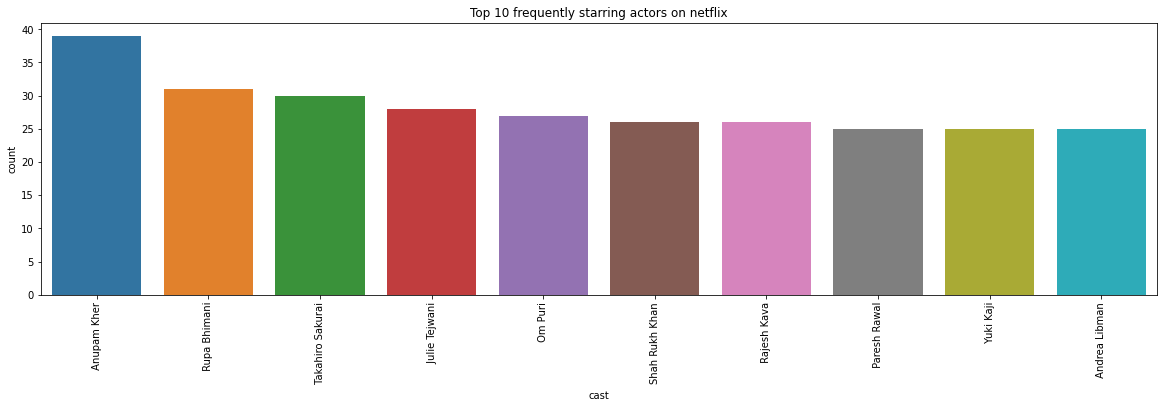

In [254]:
#Top 10 frequently starring actors on netflix
plt.figure(figsize=(20,5))
top_10_cast = df_cast['cast'].value_counts().index[1:11]
sns.countplot(data=df_cast.loc[df_cast['cast'].isin(top_10_cast)],x='cast',order=top_10_cast)
plt.xticks(rotation=90)
plt.title('Top 10 frequently starring actors on netflix')
plt.show()

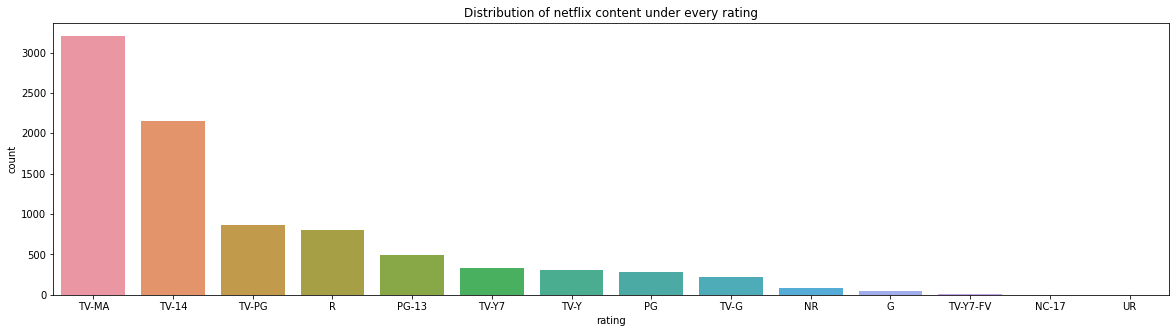

In [263]:
#distribution of netflix content under every rating
plt.figure(figsize=(20,5))
sns.countplot(data=df,x='rating',order=df['rating'].value_counts().index)
plt.title('Distribution of netflix content under every rating')
plt.show()

### 4.3 For correlation: Heatmaps



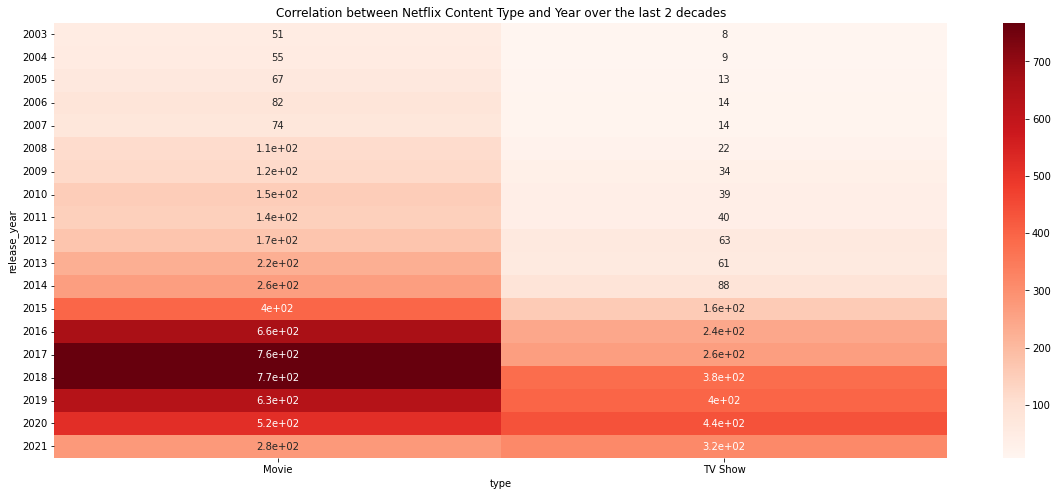

In [256]:
#Correlation between Netflix Content Type and Year over the last 2 decades
plt.figure(figsize=(20,8))
correlation=pd.crosstab(df.loc[df['release_year'] > 2002,'release_year'],df.loc[:,'type'])
sns.heatmap(correlation, cmap= 'Reds', annot=True)
plt.title('Correlation between Netflix Content Type and Year over the last 2 decades')
plt.show()

# 5. Missing Value & Outlier check 

In [257]:
data.isna().sum() #missing value detection - across every column

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [258]:
#Missing value treatment
data['director']=data['director'].fillna('director unknown')
data['cast']=data['cast'].fillna('cast unknown')
data['country']=data['country'].fillna('country unknown')
data = df.dropna().reset_index(drop=True) 
data.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

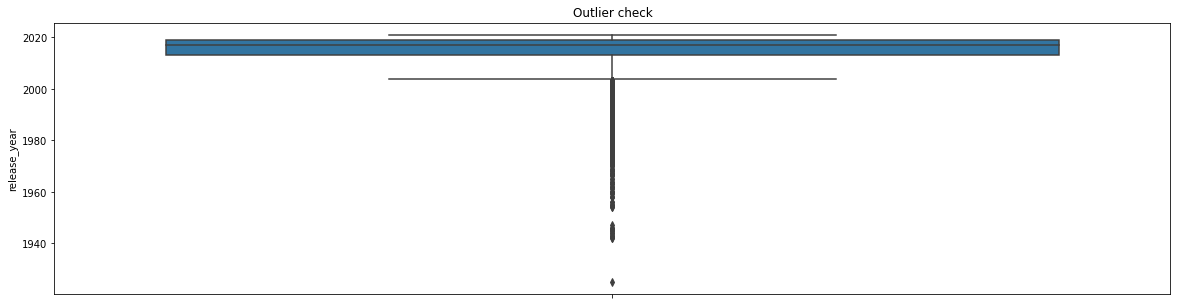

In [261]:
#outlier check
plt.figure(figsize=(20,5))
sns.boxplot(data=df,y='release_year')
plt.title('Outlier check')
plt.show()

From the above box plot between release year and the netflix content, we can see that the outliers lie below the year 2000 to 1925.

# 6. Insights based on Non-Graphical and Visual Analysis




1. The dataframe consists of 8807 rows and 12 columns.
2. The columns : country, director, cast, rating, duration has missing values. The first 3 columns mentioned above are imputed, since the missing value percentage is very high. For the later 2 columns the rows are dropped, since the percentage is negligible.
3. Netflix has more Movie content as compared to TV shows (6131:2676).
4. With the help of histogram, we have plotted the relation between total number of Movie/Tv show releases over the years, months and day of the week.
5. Also with the help of box plot, we have plotted the distribution of Movies/TV shows throughout the years, which gives us related statistical information.
6. Using countplot, we have found the top 10 content producing counties, top 10 frequqntly starring actors on netflix, content for every genre and content under every rating available on netflix.
7. Lastly using heatmap, correlation between netflix content type and year over the last 2 decades is plotted. 




# 7. Business Insights

1. Top content producing countries are united states, india, united kingdom, canada and japan.
2. Top 5 genres having most content on netflix are international movies, dramas, comedies, international tv shows and documentaries.
3. July and December are the top 2 months during which most of the netflix content (movies and tv shows) were added.
4. Most of the netflix content were released during the weekends, that is during friday and thursday.
5. Top 3 ratings under which most of the netflix content resides are TV-MA, TV-14, TV-PG and the content under the ratings - NC-17 and UR are the least.
6. Top 5 actors who are most frequently starred in netflix are anupam kher, rupa bhimani, takahiro sakurai, julie tejwani and om puri.
7. Number of movies added to netflix reached its peak during the year 2020 and most number of tv shows were added during the year 2021.



# 8. Recommendations

1. As the netflix content under TV-MA is the most popular in netflix, we can focus on creating more quality content of the same ratings to appeal to those big audience.
2. From our analysis, we can see that it is during the weekend that most of the people tend to watch netflix. So we can release more content during those days of week (thursday,friday).
3. Since international movies, dramas and comedies are the most loved genres by the netlix community, we can focus on producing more of those content.
4. Anupam kher, rupa bhimani, takahiro sakurai and julie tejwani are the actors who are loved by netflix fanbase. So investing in content related to these actors can bring more profit.
5. Netflix should focus on releasing more content during the months july and december as the analysis has showed positive reaction to content released during those timeframe.
